## Aritmética de punto flotante

Link a conversor __[IEEE 754 precisión simple](https://www.h-schmidt.net/FloatConverter/IEEE754.html)__

_El objetivo de este notebook es acercar a la práctica lo visto en las diapositivas del laboratorio, e ir calentando las aguas para los desafíos que vendran. Usenla en combinación con las diapositivas._

## Una inocente suma

Si hacemos 0.2 + 0.3 en la computadora, esperamos encontrar 0.5 como resultado, ¿pero qué está pasando realmente de fondo? Exploremos más esta operación.

In [1]:
0.25 + 0.3 # El resultado es acorde a lo esperado

0.55

In [2]:
x = 0.3 # Si pedimos que se imprima el valor no se observa nada raro.
print(x)

0.3


Sin embargo, si calculamos la diferencia entre ambos (que debería da 0.1), algo "inesperado" ocurre:

In [13]:
0.3 - 0.25 # El resultado es CASI 0.0.05

0.04999999999999999

_Para pensar_: 
- Escriba el número 0.25 en base 2. ¿Cómo queda expresado en términos de su mantisa y exponente?

> Como $0.25$ es una fracción, usamos la técnica de multiplicar por $2$ y quedarnos con la parte entera:
>
> $$0.25 \times 2 = 0.5 \longrightarrow \text{ parte entera: }0$$
>
> $$0.5 \times 2 = 1.0 \longrightarrow \text{ parte entera: }1$$
>
> Tenemos que $0.25_{10} = 0.01_2 = 1.0 \times 2^{-2}$
>
> Entonces nos queda que mantisa: $1.0$ y el exponente: $-2$

- Escriba el número 0.3 en base 2. ¿Qué dificultades aparecen al escribir 0.3 en binario? ¿Se puede escribir exactamente con una mantisa finita?

> Si aplicamo el mismo truco como antes, nos queda que...
>
> $$0.3 \times 2 = 0.6 \longrightarrow \text{ parte entera: }0$$
> 
> $$0.6 \times 2 = 1.2 \longrightarrow \text{ parte entera: }1$$
>
> $$0.2 \times 2 = 0.4 \longrightarrow \text{ parte entera: }0$$
>
> $$0.4 \times 2 = 0.8 \longrightarrow \text{ parte entera: }0$$
>
> $$0.8 \times 2 = 1.6 \longrightarrow \text{ parte entera: }1$$
>
> $$0.6 \times 2 = 1.2 \longrightarrow \text{ parte entera: }1$$
>
> $$0.2 \times 2 = 0.4 \longrightarrow \text{ parte entera: }0$$
>
> $$...$$
>
> Se repite 0011 infinitamente...
>
> No se puede escribir con una mantisa finita. El número 0.3 tiene una expansión binaria periódica infinita. Esto significa que no se puede representar exactamente con una cantidad finita de bits en la mantisa. Es similar a cómo 1/3 en base 10 = 0.333... no puede escribirse con precisión finita.
>
> Dificultades:
>
> - Precisión limitada: cuanto más larga sea la parte periódica, más error se acumula al trabajar con ella.
> - Errores numéricos: esto puede causar que comparaciones como 0.1 + 0.2 == 0.3 fallen, porque 0.3 no se representa con exactitud.

Otro ejemplo:

- ¿Cuánto da $(\sqrt{2})^2 - 2$? Simbólicamente sabemos que el resultado es 0, pero...


In [1]:
import numpy as np
np.sqrt(2)**2-2 

4.440892098500626e-16

_Para pensar_: ¿cuántos errores de redondeo se comenten al realizar la operación anterior? ¿Qué operaciones generan el error?

> Se comenten dos errores principales:
>
> - Al calcular $\sqrt{2} \rightarrow$ la raíz cuadrada no es exacta.
> - Al elevar al cuadrado $\rightarrow$ se propaga y amplifica el error.

In [7]:
import numpy as np
import sympy as sp

# -------- Con numpy (coma flotante)
sqrt2_np = np.sqrt(2)
resultado_np = sqrt2_np**2 - 2

print("Con numpy:")
print("sqrt(2)^2 - 2 =", resultado_np)

# -------- Con sympy (cálculo simbólico)
x = sp.sqrt(2)
resultado_sp = x**2 - 2

print("\nCon sympy:")
print("sqrt(2)^2 - 2 =", resultado_sp.simplify())


Con numpy:
sqrt(2)^2 - 2 = 4.440892098500626e-16

Con sympy:
sqrt(2)^2 - 2 = 0


Un ejemplo más:

- ¿Cuál es el límite cuando $n \rightarrow \infty$ de esta sucesión?
$$
\begin{aligned}
x_1 &= \sqrt{2} \\
x_{n+1} &= \frac{x_n \cdot x_n}{\sqrt{2}}
\end{aligned}
$$

Algebráicamente podemos calcular:

$x_1 = \sqrt{2}$, $x_2 = \frac{x_1 \cdot x_1}{\sqrt{2}} = \frac{2}{\sqrt{2}} = \sqrt{2} = x_1$,

con lo cual podemos concluir que la serie converge en el primer paso, ya que necesariamente será $x_3=x_2=x_1$, etc.

Si lo calculamos con la máquina:

In [19]:
x = np.sqrt(2)
print(x)
l = [x]
for i in range(50):
    x = (x * x) / np.sqrt(2)
    l.append(x)
print(x)

1.4142135623730951
1.5150587093244452


Text(0, 0.5, 'Elemento de la sucesión, $x_i$')

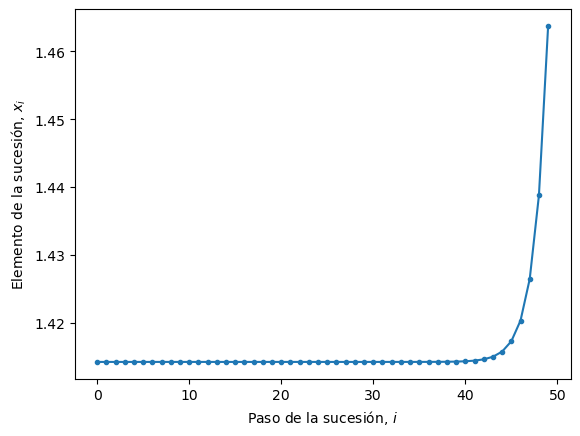

In [11]:
# Si visualizamos la sucesión:
import matplotlib.pyplot as plt
plt.plot(l[:50],marker='.') # Visualizamos los primeros 50 para poder observar el comportamiento
plt.xlabel('Paso de la sucesión, $i$')
plt.ylabel('Elemento de la sucesión, $x_i$')

Pueden ver como desde el paso $40$ el error empieza volverse visible y se dispara muy rápidamente.

In [11]:
np.sqrt(2)/100000 # Preguntar para qué está

1.4142135623730951e-05

In [14]:
10.0**(-3) # Preguntar para qué está

0.001

## Acumulación de errores

1. Se quiere calcular 
$$
\sum_{i=1}^{10^n} \frac{1}{i} \quad y \quad \sum_{i=1}^{5\cdot10^n} \frac{1}{i} 
$$ 
usando aritmética de simple precisión (`float32`). Ejecutar los siguientes programas e interpretar los resultados, observando en particular el resultado para $n=6$ y $n=7$. ¿Qué está ocurriendo?

In [17]:
import numpy as np

n = 7
s = np.float32(0)
for i in range(1,10**n+1):
    s = s + np.float32(1/i)
print("suma = ", s)

s = np.float32(0)
for i in range(1,5*10**n+1):
    s = s + np.float32(1/i)
print("suma = ", s)


suma =  15.403683
suma =  15.403683


_Algunas preguntas guía_:
- ¿Cuánto vale $1/i$ en precisión simple cuando $i=2\cdot 10^7$?



- Si escribimos $1/10^7$ usando el mismo exponente que el necesario para representar a $\sum^{5\cdot 10^6}_{i=1} 1/i$, ¿a cuánto equivale $1/i$?



In [19]:
np.float32(1 / (2 * 10**7))

5e-08

> float32 tiene aproximadamente 7 cifras decimales de precisión. Entonces si s ya está acumulando un número en el orden de log(5e7) ≈ 17.7, ¡sumarle un número como 5e-8 ya no cambia nada!

> Para $n = 6$ y $n = 7$ en float32, muchos de los últimos términos de la serie $1/i$ ya no afectan el resultado, ¡porque $1/i$ es demasiado chico para ser sumado a $s$ sin perderse en el redondeo! La suma se estanca y no sigue creciendo, aunque teóricamente debería hacerlo.

- ¿Qué modificación podría hacerse para reducir los errores numéricos?

In [24]:
# Si invertimos el orden de la sumatoria, el nuevo sumando tiene un orden similar al de la sumatoria previa
s = np.float32(0)
for i in range(2*10**n,0,-1):
    s = s + np.float32(1/i)
print("suma = ", s)

suma =  17.39009


> Aunque al invertir el orden empezás con valores chicos, el truco está en que el acumulador $s$ también es chico al principio, entonces no se pierde precisión al sumar. En cambio, al ir en orden natural, sumás cosas cada vez más chicas a un número cada vez más grande $\rightarrow$ se pierden por redondeo cuando estás en float32.

2. Utilizar las mismas estrategias para estimar $e$ mediante la serie
$$
e \approx \sum_{n=0}^{10} \frac{1}{n!}.
$$

Comparar el resultado de cada estrategia con el valor real con el valor real (recordar que existe `np.e`).

In [29]:
import math
s = np.float32(0)
for i in range(10):
    s = s + np.float32(1/math.factorial(i))
print("suma = ", s)
print("e =", np.e)

suma =  2.7182817
e = 2.718281828459045


In [33]:
import math
s = np.float32(0)
for i in range(10, 0 , -1):
    s = s + np.float32(1/math.factorial(i))
print("suma = ", s)
print("e =", np.e)

suma =  1.7182817
e = 2.718281828459045


> - Sumar de menor a mayor es generalmente mejor en precisión cuando los valores no varían tanto en magnitud.
> - En series como la de $e$, donde los primeros términos pesan mucho más, sumar del 0 al 10 es más estable numéricamente en float32, porque los términos grandes (los que realmente "cuentan") se suman primero sin arrastre de error.
> - En sumatorias armónicas, donde todos los términos son importantes pero pequeños, conviene sumar de mayor a menor.

3. El siguiente código suma 1 $10^8$ veces. ¿Coincide la respuesta con el valor esperado? ¿Es posible modificar el código para calcular el valor correcto?

In [37]:
c = np.float32(0.0)
for i in range(10**8):
    c += np.float32(1)
print(c)

16777216.0


In [40]:
c = np.float32(1) * 10**8
print(c)

100000000.0


> - float32 tiene una precisión limitada (~7 cifras decimales significativas).
> - A medida que $c$ crece (por ejemplo, cuando $c \approx 1e8$), el número $1.0$ ya no tiene suficiente "peso" en los bits de precisión para afectar a $c$. Dicho de otro modo: $1.0$ se vuelve tan pequeño comparado con $c$ que no cambia nada cuando se suma.

In [52]:
import numpy as np

c = np.float32(0.0)
bloque = np.float32(0.0)
bloque_size = 1000

for i in range(10**8):
    bloque += np.float32(1)
    if (i + 1) % bloque_size == 0:
        c += bloque
        bloque = np.float32(0.0)

# Asegurarse de sumar el último bloque si no es múltiplo exacto
if bloque != 0:
    c += bloque

print(c)


100000000.0


# Características del `float64`

In [46]:
# Máximo número flotante que puede representar Python:
print('Máximo número flotante que puede representar Python: ', np.finfo(float).max, '\n')

# Mínimo flotante positivo normalizado que puede representar Python:
print('Mínimo flotante positivo [normalizado] que puede representar Python: ', np.finfo(float).tiny, '\n')

# Mínimo flotante positivo [subnormal] que puede representar Python:
print('Mínimo flotante positivo [subnormal] que puede representar Python: ', np.nextafter(0., 1.), '\n')

# Epsilon de máquina
print('Epsilon de máquina: ', np.finfo(float).eps)

Máximo número flotante que puede representar Python:  1.7976931348623157e+308 

Mínimo flotante positivo [normalizado] que puede representar Python:  2.2250738585072014e-308 

Mínimo flotante positivo [subnormal] que puede representar Python:  5e-324 

Epsilon de máquina:  2.220446049250313e-16


In [47]:
# Veamos que efectivamente el épsilon de máquina es el número de máquina más chico tal que 1 + eps es distinto de 1

eps = np.finfo(np.double).eps
print('1 + ε =', 1 + eps)
print('1 + ε/2 =', 1 + eps/2,'\n')

print('¿1 + ε = 1?', 1 + eps == 1)
print('¿1 + ε/2 = 1?', 1 + eps/2 == 1)

1 + ε = 1.0000000000000002
1 + ε/2 = 1.0 

¿1 + ε = 1? False
¿1 + ε/2 = 1? True


## Volviendo al 0.1

Vamos a explorar un poco más en detalle cómo representa la máquina al inocente 0.1, y de paso familiarizarnos con algunas funciones de `numpy` más.

In [54]:
print(0.1)
print(f"{np.single(0.1):.17f}") # muestro 17 lugares después de la coma
# format(0.1,'.17f') # hace lo mimso que lo de arriba

0.1
0.10000000149011612


In [56]:
# Si lo representamos con mayor número de decimales, vemos que 0.3 y 0.1+0.2 no son lo mismo
print(f"0.1 + 0.2 = {0.1:.17f} + {0.2:.17f} = {0.1+0.2:.17f}") 
print(f"0.3 = {0.3:.17f}")

0.1 + 0.2 = 0.10000000000000001 + 0.20000000000000001 = 0.30000000000000004
0.3 = 0.29999999999999999


¿Qué entiende la máquina por 0.1?

In [60]:
# Esto devuelve la mantissa como un valor entre -1 y 1 y el exponente del 2 (formato amigable)
np.frexp(np.single(0.1))

(0.8, -3)

In [62]:
# Chequeo
mantissa, exp = np.frexp(np.single(0.1))
mantissa * 2.**exp

0.10000000149011612

Si les hace ruido que el $0.8$ no está en binario, ¡bien! Lo que pasa es que, en realidad, el 0,8 es 0,[tira de 24 1s y 0s]. Si pedimos que lo represente explicitamente:

In [64]:
mantissa_maquina = mantissa*(2**24) # corro la coma 24 lugares 

print('Mantissa guardada:')
f"{int(mantissa_maquina):b}" # muestro en binario


Mantissa guardada:


'110011001100110011001101'

Aunque en verdad, verdad, no guarda $0,8 . 2^{-3}$ si no $1,6 . 2^{-4}$,

donde el $1$ se asume y lo que se guarda es el $0,6$ en binario con 23 dígitos.

O sea que el primer 1 de arriba no se guarda

In [66]:
print('Mantissa guardada de verdad:')
f"{int(mantissa_maquina):b}"[1:] # muestro en binario

Mantissa guardada de verdad:


'10011001100110011001101'

# Jugando con `float16`

`np.float16` es una versión de punto flotante de 16 bits. 

Se usa 1 bit para el signo, 5 para el exponente y 10 para la mantissa (que recordando el truco del 1 que vimos para `float64`,  puedo emplear 11 digitos signficativos)

In [68]:
# Máximo número flotante que puede representar en float16:
print('Máximo número flotante que puede representar en float16: ', np.finfo(np.float16).max, '\n')

# Mínimo flotante positivo normalizado que puede representar en float16:
print('Mínimo flotante positivo [normalizado] que puede representar en float16: ', np.finfo(np.float16).tiny, '\n')

# Mínimo flotante positivo [subnormal] que puede representar en float16:
print('Mínimo flotante positivo [subnormal] que puede representar en float16: ', np.nextafter(np.float16(0.), np.float16(1.)), '\n')

# Epsilon de máquina
print('Epsilon de máquina: ', np.finfo(np.float16).eps)

Máximo número flotante que puede representar en float16:  65500.0 

Mínimo flotante positivo [normalizado] que puede representar en float16:  6.104e-05 

Mínimo flotante positivo [subnormal] que puede representar en float16:  6e-08 

Epsilon de máquina:  0.000977


Fijense que la precisión es del orden de 0.001. Así que es parecido a trabajar con base 10 y mantissa de 3 digitos

In [71]:
np.nextafter(np.float16(1),np.float16(2))

1.001

A partir de $2^{10} = 1024$ y hasta $2^{11} = 2048$ los números que puedo representar son los enteros

In [74]:
print("El siguiente a 1024 es: ")
np.nextafter(np.float16(1024),np.float16(2000))

El siguiente a 1024 es: 


1025.0

A partir de $2^{11} = 2048$ ya sólo tengo números pares

In [77]:
print("El siguiente a 2048 es: ")
np.nextafter(np.float16(2048),np.float16(2050))

El siguiente a 2048 es: 


2050.0

### Algunos problemas con la representación de 16 bits


In [80]:
# Problema 1: sumar dos números muy distintos en magnitud hace que el más chico sea ignorado
x = np.float16(2048)
y = np.float16(1)
print(f'{x} + {y} = {x + y}')
print(x + y == x)

2048.0 + 1.0 = 2048.0
True


In [82]:
# Problema 1': lo mismo puede pasar si sumamos muchos números chicos
# Acá hago 1 + 1 + 1 + ... 3000 veces
s =  np.float16(0)
for i in range(3000):
    s += np.float16(1)
s

2048.0

In [84]:
# Problema 1'': también si sumamos cosas cada vez más chiquitas

# Hago un doble for para calcular las sumas parciales de 1/n hasta distintos valores
for n in range(200,1001,200):
    s =  np.float16(0)
    for i in range(1,n):
        s += np.float16(1/i)
    print(f'Suma de los primeros {n} terminos de 1/n : {s}')
f'Conclusión: la serie armonica converge a {s} :('

Suma de los primeros 200 terminos de 1/n : 5.86328125
Suma de los primeros 400 terminos de 1/n : 6.64453125
Suma de los primeros 600 terminos de 1/n : 7.0859375
Suma de los primeros 800 terminos de 1/n : 7.0859375
Suma de los primeros 1000 terminos de 1/n : 7.0859375


'Conclusión: la serie armonica converge a 7.0859375 :('

In [86]:
# Problema 2: restar dos números muy parecidos genera cancelaciones catastróficas 
x = 256.22
y = 256.02
flx = np.float16(x)
fly = np.float16(y)

print(f'Cuenta bien: {x} - {y} = {x - y:.2f}')
print(f'En float16: {flx} - {fly} = {flx - fly}')

error = np.float16(abs((x-y)-(flx-fly)))
print('Errror = ',error)
print(f'Error relativo = {error:.2f}/{(x-y):.2f} = {error/(x-y):.0%}')

Cuenta bien: 256.22 - 256.02 = 0.20
En float16: 256.25 - 256.0 = 0.25
Errror =  0.05
Error relativo = 0.05/0.20 = 25%
